In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

%config InlineBackend.figure_format = 'retina'

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/StudentsPerformance.csv")

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
columns = df.columns
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
for i in columns:
  print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']
[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24  29  40]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  86  28  46
  61  63  53  80  72  55  65  38  82  79  83  59  57  54  68  66  62  76
  

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

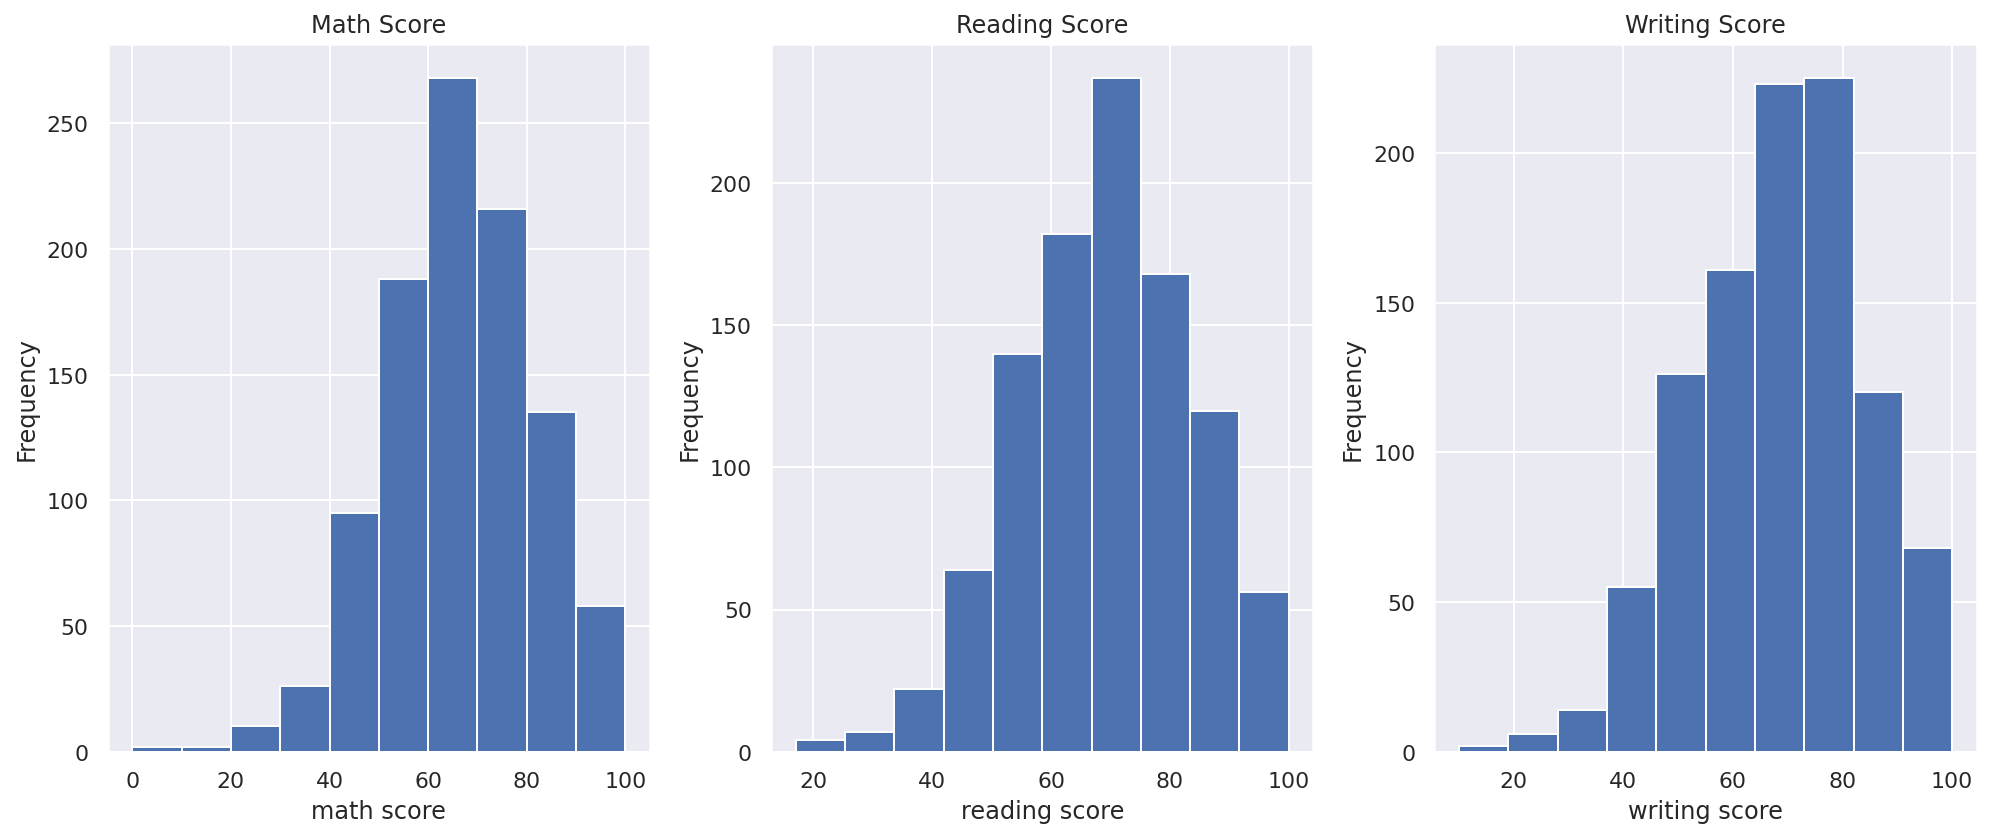

In [ ]:
plt.figure(figsize= (14,6))

plt.subplot(1,3,1)
df["math score"].plot(kind="hist")
plt.title("Math Score")
plt.xlabel ("math score")
plt.tight_layout()

plt.subplot(1,3,2)
df["reading score"].plot(kind="hist")
plt.title("Reading Score")
plt.xlabel ("reading score")
plt.tight_layout()

plt.subplot(1,3,3)
df["writing score"].plot(kind="hist")
plt.title("Writing Score")
plt.xlabel ("writing score")
plt.tight_layout()

Checking whether it's a balanced column or not

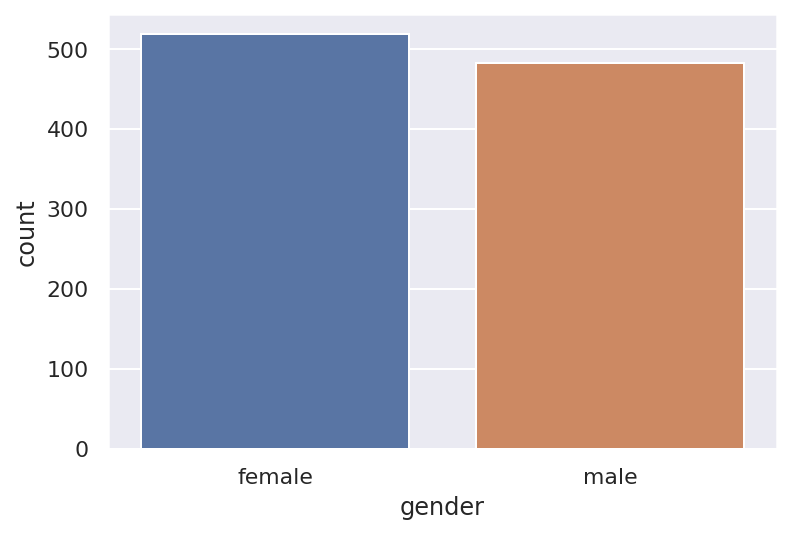

In [ ]:
sns.countplot(df["gender"])

How many percentage of students take preparatory classes


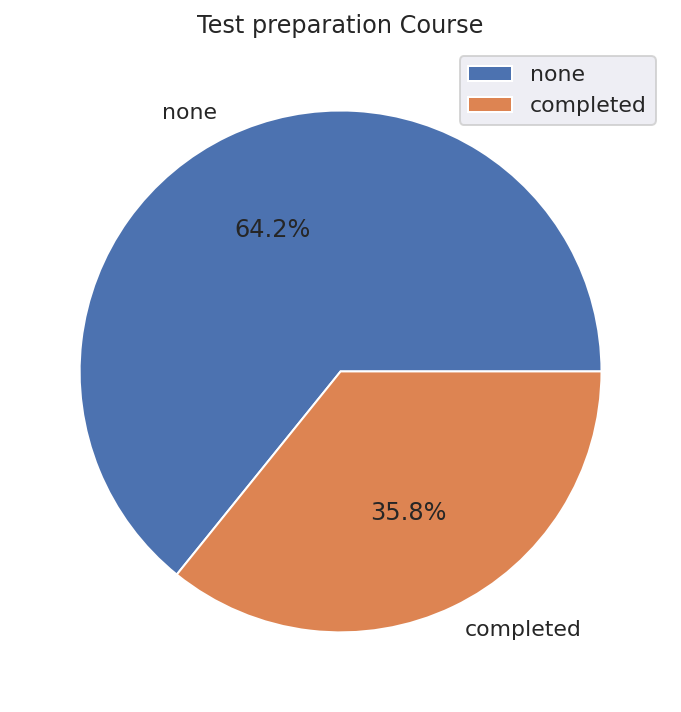

In [ ]:
count_test = df["test preparation course"].value_counts()
labels = df['test preparation course'].value_counts().index

plt.figure(figsize=(6,6))
plt.pie(count_test, labels = labels, autopct = "%1.1f%%")
plt.title("Test preparation Course")
plt.legend(labels)
plt.show()

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##Student Performance  in subjects based on gender

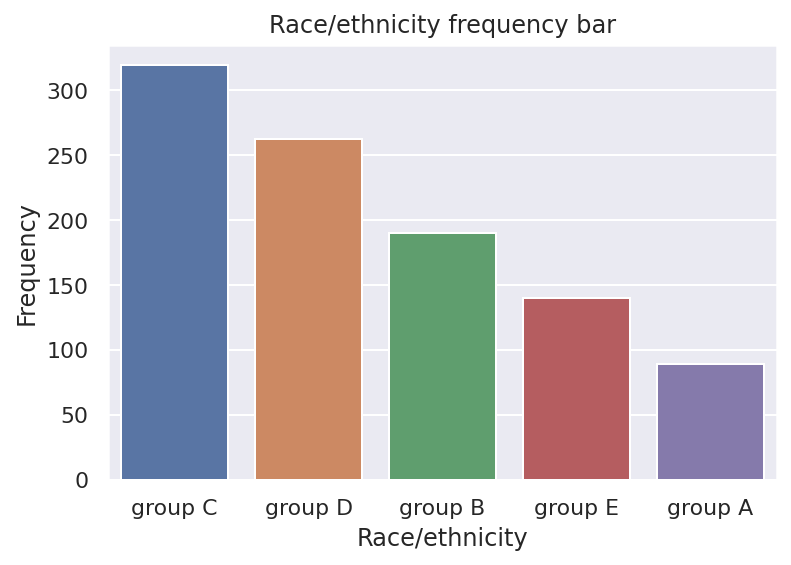

In [ ]:
sns.barplot(x= df['race/ethnicity'].value_counts().index,
            y= df['race/ethnicity'].value_counts().values )

plt.xlabel("Race/ethnicity")
plt.ylabel("Frequency")
plt.title("Race/ethnicity frequency bar")
plt.show()

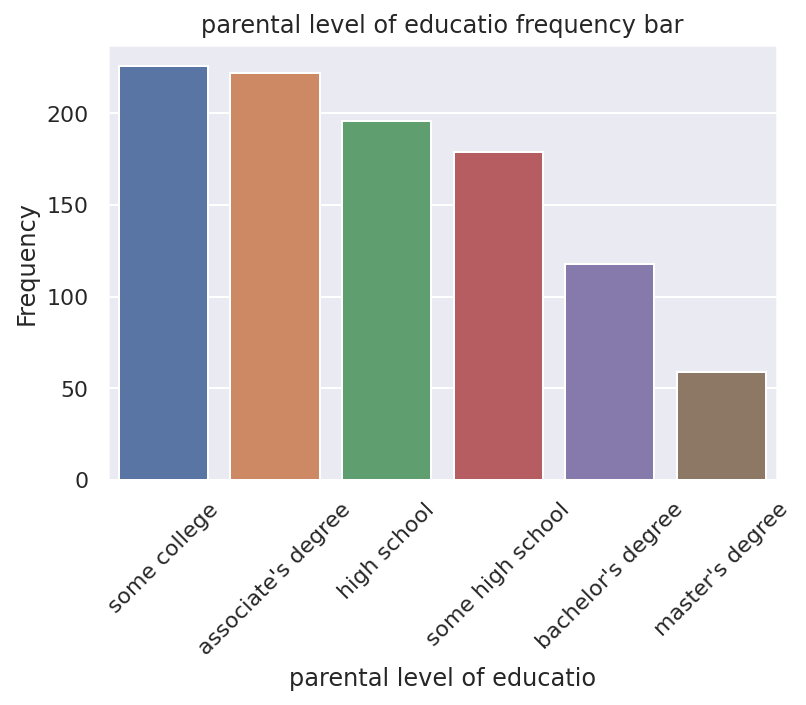

In [ ]:
sns.barplot(x= df['parental level of education'].value_counts().index,
            y= df['parental level of education'].value_counts().values )

plt.xticks(rotation= 45)
plt.xlabel("parental level of educatio")
plt.ylabel("Frequency")
plt.title("parental level of educatio frequency bar")
plt.show()

Text(0.5, 1.0, '2D-Heat Map showing correlation of math, reading and writing scores')

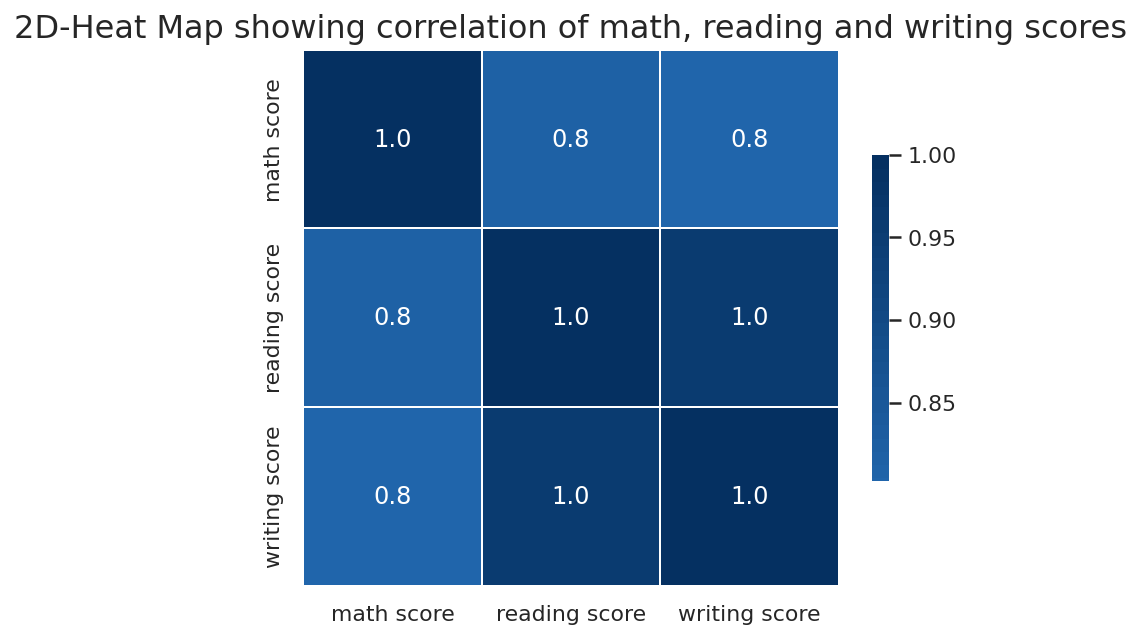

In [ ]:
fig = plt.figure(figsize=(6,6))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt = ".1f", square=True, center=0, linewidth=.5, cmap ="RdBu",
            cbar_kws={"shrink":.5})
plt.title("2D-Heat Map showing correlation of math, reading and writing scores", size = 16)

In [ ]:
df['percentage'] = (df['math score'] + df['reading score']+ df['writing score'])/3
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


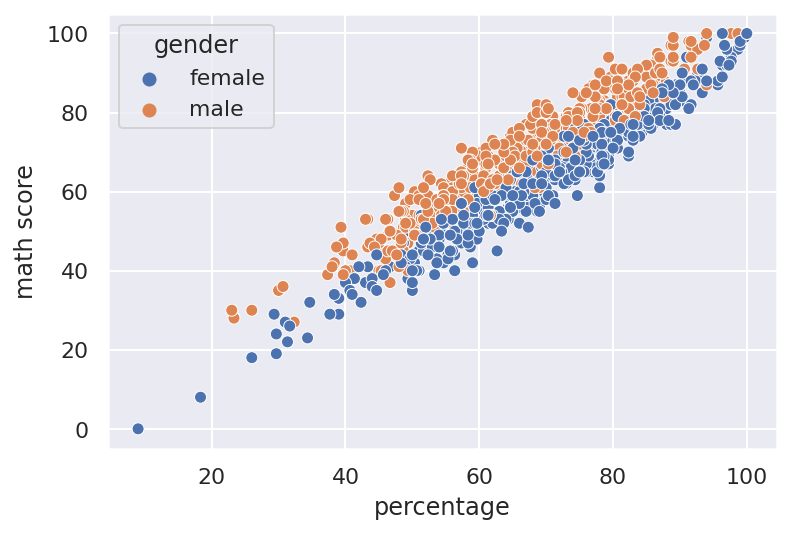

In [ ]:
sns.scatterplot(x=df["percentage"] , y =df['math score'], hue = df['gender'])

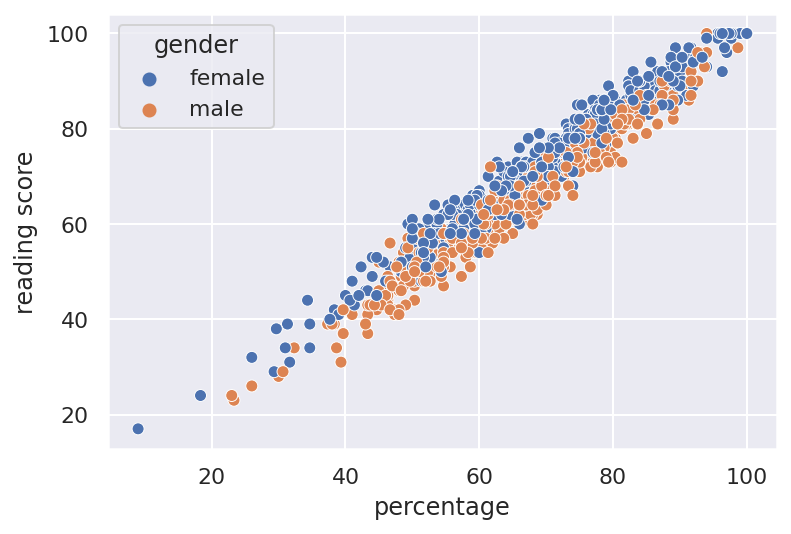

In [ ]:
sns.scatterplot(x=df["percentage"] , y =df['reading score'], hue = df['gender'])

In [ ]:
def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'

df['grades']=df['percentage'].apply(determine_grade)

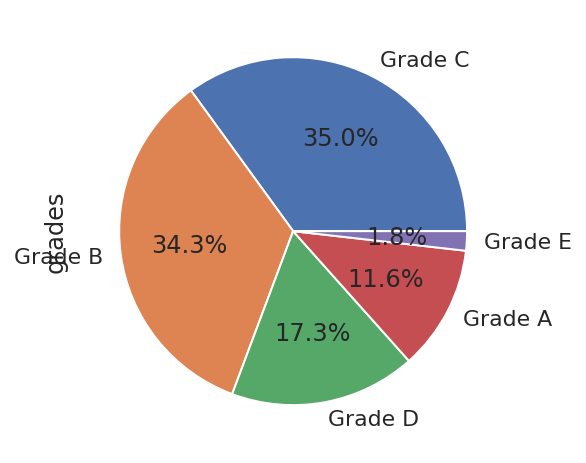

In [ ]:
df['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

In [ ]:
# df

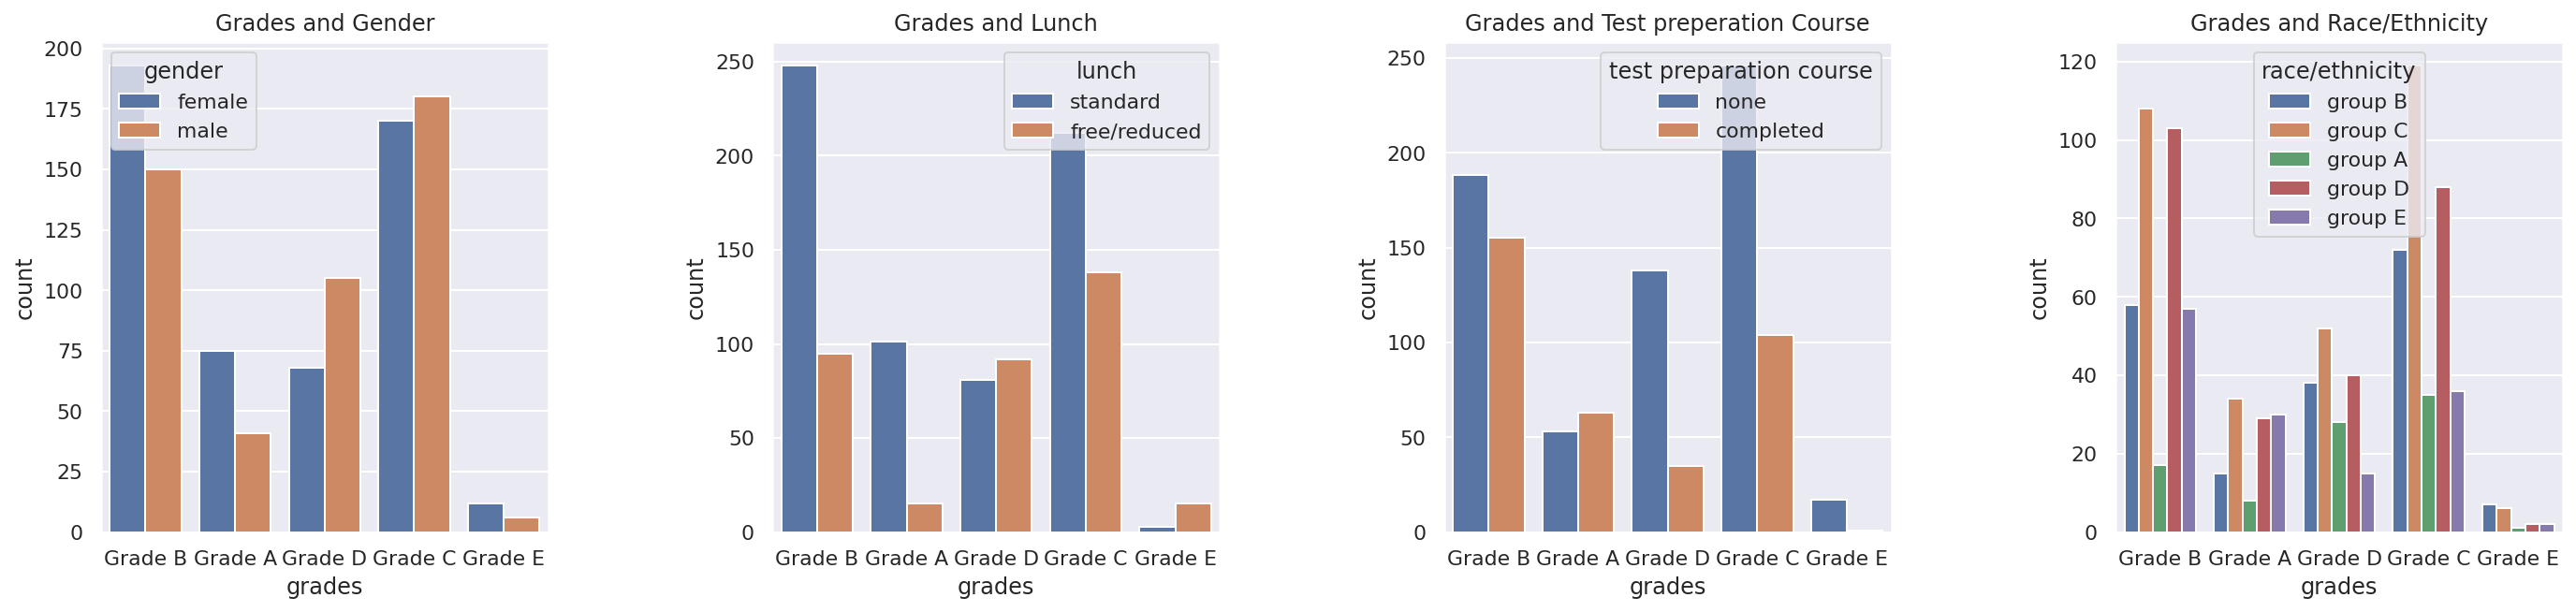

In [ ]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(251)
plt.title('Grades and Gender')
sns.countplot(hue="gender", x="grades", data=df)

plt.subplot(252)
plt.title('Grades and Lunch')
sns.countplot(hue="lunch", x="grades", data=df)

plt.subplot(253)
plt.title('Grades and Test preperation Course')
sns.countplot(hue="test preparation course", x="grades", data=df)

plt.subplot(254)
plt.title('Grades and Race/Ethnicity')
sns.countplot(hue="race/ethnicity", x="grades", data=df)

plt.show()

In [ ]:
#Converting string to numeric data
#gender
df= df.replace({'male':1,'female':0})
#race/ethinic group
df= df.replace({'group A':0, 'group B':1, 'group C':2, 'group D':3, 'group E':4})
#lunch
df= df.replace({'free/reduced':0, 'standard':1})
#test preparation course
df= df.replace({'none':0, 'completed':1})
#parents education
df= df.replace({'some college':3, "associate's degree":2, 'high school':4,
                 'some high school':5, "bachelor's degree":1, "master's degree":0})
df = df.drop(["lunch"], axis=1)


In [ ]:
df['gender'].value_counts()

0    518
1    482
Name: gender, dtype: int64

In [ ]:
# df = df.drop(["grades"],axis =1)

In [ ]:
y= df["percentage"]
X= df[df.columns.difference(["percentage"])]
X.head()

,gender,grades,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,0,Grade B,72,1,1,72,0,74
1,0,Grade B,69,3,2,90,1,88
2,0,Grade A,90,0,1,95,0,93
3,1,Grade D,47,2,0,57,0,44
4,1,Grade B,76,3,2,78,0,75


In [ ]:
labels = ["Fail","Pass"]
bins =[0,75,100]
y = pd.cut(y,bins,labels = labels)
y.head()

0    Fail
1    Pass
2    Pass
3    Fail
4    Pass
Name: percentage, dtype: category
Categories (2, object): ['Fail' < 'Pass']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),columns=cols)
X.head()

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                        y,test_size=0.3,random_state=42)
print("Length of training Dataset: ",len(y_train))
print("Length of testing Dataset: ",len(y_test))

In [ ]:
y_train.head(),y_test.head()

Decision Tree Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model=DecisionTreeClassifier (max_leaf_nodes=None,random_state=42)
model.fit (X_train,y_train) # Training the model
score=model.score (X_test,y_test) # Test accuracy and performance
print('Accuracy score of Decision Tree Classifier: %f'% (score*100))
predict=model.predict(X_test)
scores=cross_val_score(model,X,y,cv=10)
print("\nDecision Tree Classifier: "+"cross_val_score: "+
      str(np.mean(scores)*100))

accuracy=accuracy_score(y_test,predict)

precision=precision_score(y_test,predict,average='micro')


recall=recall_score(y_test,predict,average='micro')


precision=precision_score(y_test,predict,average='micro')


f1=f1_score(y_test,predict,average='micro')


cm=confusion_matrix(y_test,predict)
print('\nConfusion matrix\n',(cm))

print('\nClassification Report:')
print(classification_report(y_test,predict))

Classification Report

In [ ]:
import numpy as np
pred=np.array(X_test.loc[522,:]).reshape(1,-1)
prediction=model.predict(pred)[0]
print("You %s "% prediction)

Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
model=LogisticRegression(solver='liblinear', C=1.0,random_state=0)
model.fit(X_train,y_train)
#prediction on test dataset
#y_pred=model.
y_pred=model.predict(X_test)
predictor=model.score(X_test,y_test)
#print(y_pred)
print("Accuracy of the Logistic Regression model:  %f"%(predictor*100))

c1 =confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix: \n",c1)

print("\nclassification_report:\n")
print(classification_report(y_test, y_pred))

Linear Regression

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)
# reg=LinearRegression()
# reg.fit(X_train,y_train)

In [ ]:
# y= df['percentage'].values

In [ ]:
# model = SVR(kernel='rbf',gamma = "auto")
# model.fit(X-train, y_train)

Random Forest Classifi

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
cols=X.columns
minmax_scale=scaler.fit(X[cols])
X[cols]=pd.DataFrame(minmax_scale.transform(X[cols]),
                columns=cols)
X.head()
y=y.replace({'Fail':0, 'Pass':1})
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

In [ ]:
df['parental level of education'].value_counts()

In [ ]:
# level = {
#     "bachelor's degree":0,
#     "some college":1,
#     "maste's degree":2,
#     "associate's degree":3,
#     "high school":4,
#     "some high school":5
# }
# df['parental level of education'] = df['parental level of education'].map(level)
# df

In [ ]:
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import  RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10101)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score


from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC # SVM model with kernels
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# temp = df.drop(labels = ["lunch","parental level of education","race/ethnicity"])
# pd.get_dummies(df, colums=["lunch","parental level of education","race/ethnicity","test preparation course"])
# cols = X.columns
# index = X.index

# y = df["percentage"]
# cat_df = df["gender_male","gender_female",]
# cat_df

In [ ]:
# pd.get_dummies(df, drop_first= True)

In [ ]:
# le.fit_transform(y_train)

In [ ]:
# le.transform(y_train)

In [ ]:
# models = []
# models.append(('LogisticRegression', LogisticRegression(random_state = 10101)))
# models.append(('KNearestNeighbour', KNeighborsClassifier()))
# models.append(('DecsionTreeClassifier', DecisionTreeClassifier(random_state = 10101)))
# models.append(('RandomForestClassifier', RandomForestClassifier(random_state = 10101)))
# models.append(('SVM', SVC(gamma='auto', random_state = 10101)))


# # evaluate each model in turn
# results = []
# names = []

In [ ]:
# for name, model in models:
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)
#         msg = "%s: (%f)" % (name, accuracy)
#         # print(msg)